In [26]:
%matplotlib inline

In [27]:
# Setup

import pandas as pd
from pathlib import Path
import hvplot.pandas
import requests
import json
from pprint import pprint
from api_keys import geoapify_key
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Import and read files

file = Path("Resources/merged_df2.csv")
df = pd.read_csv(file, encoding="utf-8")

#df = df.drop("Unnamed: 0", axis=1)

In [28]:
# Group by country

by_country = df.groupby(["Country"])

avg_cagr = by_country["CAGR (%)"].mean()
number_startups = by_country.size()

country_df = pd.DataFrame({
    "Avg CAGR (%)": avg_cagr,
    "Number of Startups": number_startups
})

# Sort df

country_df = country_df.sort_values(by="Avg CAGR (%)", ascending = False)
country_df = country_df.reset_index()

country_df

,Country,Avg CAGR (%),Number of Startups
0,Lithuania,18.465000,2
1,Belgium,7.373333,3
2,Estonia,5.772000,5
3,Singapore,4.914615,13
4,Turkey,4.800000,3
5,Australia,3.248750,8
6,United States,2.386799,581
7,Israel,2.146667,18
8,South Korea,1.925385,13
9,Germany,1.018846,26


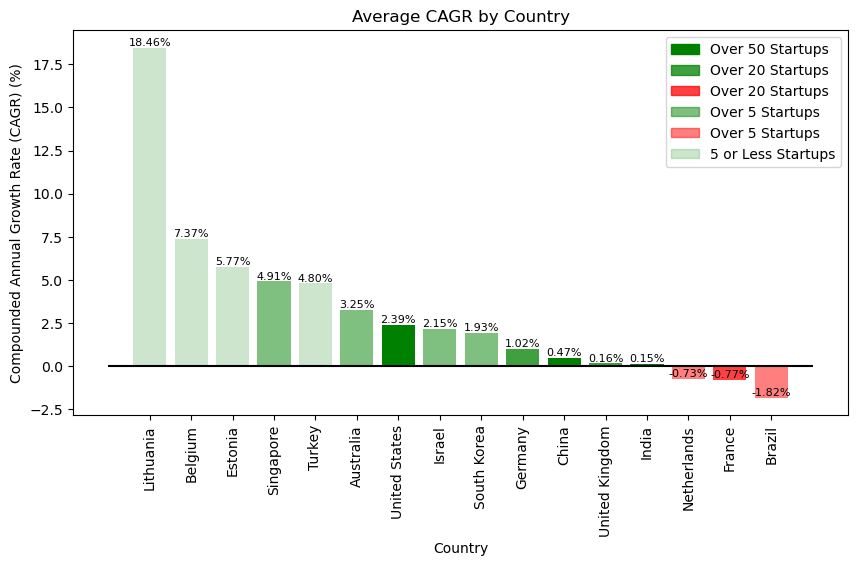

In [29]:
# Bar plot

# Filter out 0% CAGRs

country_df = country_df[country_df["Avg CAGR (%)"] != 0]

# Bar plot setup

countries = country_df["Country"].tolist()
cagr = country_df["Avg CAGR (%)"]
count = country_df["Number of Startups"]

plt.figure(figsize=(10, 5))

x_axis = np.arange(len(countries))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, rotation=90)

colors = ["green" if x > 0 else "red" if x < 0 else "black" for x in cagr]
alphas = [1 if x > 50 else 0.75 if x > 20 else 0.5 if x > 5 else 0.2 for x in count]

bars = plt.bar(x_axis, cagr, 
               color=colors
               )

for bar, alpha in zip(bars, alphas):
    bar.set_alpha(alpha)

# Data labels

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%",
             ha="center", va="bottom", fontsize=8, color="black")

# Horizontal line at 0

plt.hlines(0, -1, len(countries), color="black")

# Chart labels

plt.xlabel("Country")
plt.ylabel("Compounded Annual Growth Rate (CAGR) (%)")
plt.title("Average CAGR by Country")

# Custom legend

legend_handles = [mpatches.Patch(color="green", alpha=1, label="Over 50 Startups"),
                  mpatches.Patch(color="green", alpha=0.75, label="Over 20 Startups"),
                  mpatches.Patch(color="red", alpha=0.75, label="Over 20 Startups"),
                  mpatches.Patch(color="green", alpha=0.5, label="Over 5 Startups"),
                  mpatches.Patch(color="red", alpha=0.5, label="Over 5 Startups"),
                  mpatches.Patch(color="green", alpha=0.2, label="5 or Less Startups")
                 ]

plt.legend(handles=legend_handles)

# Save fig

plt.savefig("output_data/cagr_by_country.png", bbox_inches="tight")

plt.show()

Analysis for Average CAGR by Country

The chart displays the average compounded annual growth rate (CAGR) of unicorn startups by country over the past two years, covering the periods from 2022 to 2023 and 2023 to 2024. The colors indicate the volume of unicorn startups in each country. It is important to note that 31 countries with unicorn startups had an average CAGR of 0% and thus were excluded from this chart. 

Lithuania surpasses other countries in CAGR with an average of 18.46%, double that of Belgium, the next highest country. While Lithuania does not have as many resources or people as others, its high average CAGR rate among unicorn startups may be because of its global approach or focus on external markets, and because of its collaborative and connected internal ecosystem. The Next Web considers it a "hidden gem of Europe's startup ecosystem". 

It is also noteworthy that the top three countries in terms of average CAGR - Lithuania, Belgium, and Estonia -- are all European, with Lithuania and Estonia both situationed in the Baltic region of Northern Europe. This could potentially signal an greater growth trajectory in Europe in terms of the global startup ecosystem. 

On the other hand, while United States and China lead in the number of unicorn startups, the exhibit lower growth rates. The U.S. has 581 unicorn startups and China has 149, compared to a mean of ~17 startups per country. However, the U.S. shows an average CAGR of 2.39%, which is 12.95% of Lithuania's rate, and China lags even further behind at 0.47%. This disparity may suggest that a larger volume of unicorn startups may impede overall growth due to greater competition and market saturation. This could also be because startups in smaller countries begin targeting external markets from the start, whereas the U.S. and China have such vast internal markets to capture first. However, it is important to remember that the U.S. and China still outperform 36 countries that have both few startups and a 0% or negative CAGR. 

Conversely, Brazil stands out with a more notable decline in startup growth. Though it's average CAGR is only -1.82% and may seem minimal, only three countries have startups with declining growth rates, which is significant when compared to the growth or stability as seen in outher countries. This could be a consequence of Brazil's political instability, which is said to have decreased market confidence and discouraged investors, according to the London Financial. 

In summary, one potential takeaway from this chart is that while a country may have fewer unicorn startups, their startups could have higher growth trajectories. This could encourage investors to look to countries outside the U.S. and China, particularly Lithuania, Belgium, Estonia, Singapore, and Turkey. 

Slope: -1.5959690837392233. R value: -0.4985078143583316. P value: 0.06961835673188947.
17.071428571428573


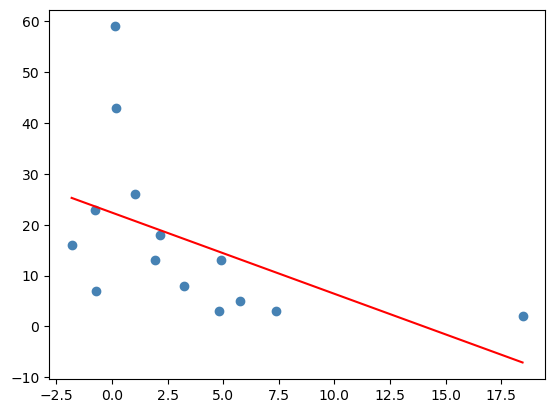

In [30]:
# Linear Regression between number of startups and CAGR - excluding outliers (U.S. and China)

from scipy import stats
from scipy.stats import linregress

country_df = country_df[country_df["Country"] != "United States"]
country_df = country_df[country_df["Country"] != "China"]

x_axis = country_df["Avg CAGR (%)"]
y_axis = country_df["Number of Startups"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="steelblue", edgecolors="steelblue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")

print(f"Slope: {slope}. R value: {rvalue}. P value: {pvalue}.")
print(f"{country_df['Number of Startups'].mean()}")

plt.show()